---

Evaluate the performances among various algorithmic, hedge, and mutual fund portfolios.

Then compare them against the S&P 500 Index.

In [65]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
# Set the file path for whale, algo, and s&p500 returns
whale_returns_file_path = Path("Resources/whale_returns.csv")
algo_returns_file_path = Path("Resources/algo_returns.csv")
sp500_file_path = Path("Resources/sp500_history.csv")

# Create a Pandas dataframe for each from a csv file
whale_df = pd.read_csv(whale_returns_file_path)
algo_df = pd.read_csv(algo_returns_file_path)
sp500_df = pd.read_csv(sp500_file_path)

# Read whale return Dataframe
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [70]:
# Check for null values in whale returns
whale_df.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [71]:
# Cleaning nulls from DataFrame in whale returns
whale_df = whale_df.dropna().copy()
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [72]:
# Set the date as the index to the Whale Returns DF
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [73]:
# Drop the extra date column in Whale returns DF
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [127]:
# Read algo return Dataframe
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [128]:
# Check for null values in algo returns
algo_df.isnull()

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [129]:
# Cleaning nulls from DataFrame in algo returns
algo_df = algo_df.dropna().copy()
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [130]:
# Set the date as the index to the Algo Returns DF
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [131]:
# Drop the extra date column in Algo returns DF
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [132]:
# Read sp500 return Dataframe
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [133]:
# Check for null values in sp500 history
sp500_df.isnull()

,Date,Close
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1644,False,False
1645,False,False
1646,False,False
1647,False,False


In [134]:
# Cleaning nulls from DataFrame in whale returns
sp500_df = sp500_df.dropna().copy()
sp500_df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [82]:
# Set the date as the index to the sp500 history DF
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06
...,...,...
2012-10-05,5-Oct-12,$1460.93
2012-10-04,4-Oct-12,$1461.40
2012-10-03,3-Oct-12,$1450.99


In [83]:
# Drop the extra date column in sp500 history DF
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [84]:
#Changing the "$" dataframe to numeric

sp500_df["Close"] = sp500_df["Close"].str.replace("$", "", regex = True)
sp500_df["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [85]:
# Retrieve DataFrame data types for sp500
sp500_df.dtypes

Close    object
dtype: object

In [86]:
# Convert `Close` column from object to float

sp500_df["Close"] = sp500_df["Close"].astype("float")

In [87]:
# Calculate the daily return using the 'pct_change()' function

daily_returns = sp500_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [88]:
sp500_df["S&P 500"] = daily_returns
sp500_df.head()

,Close,S&P 500
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279


In [89]:
sp500_df = sp500_df.drop(columns=["Close"])
sp500_df.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [90]:
# Join whale returns, algo returns and sp500 history full datasets by axis
joined_data_rows = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
joined_data_rows

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


<AxesSubplot:xlabel='Date'>

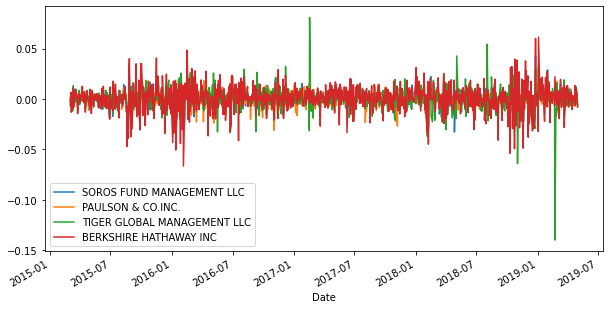

In [91]:
# Plot daily returns of Whales

whale_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

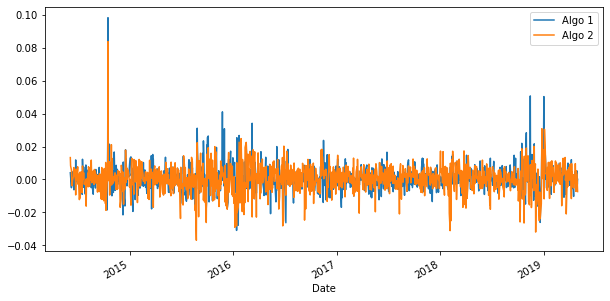

In [92]:
# Plot daily returns of Algo

algo_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

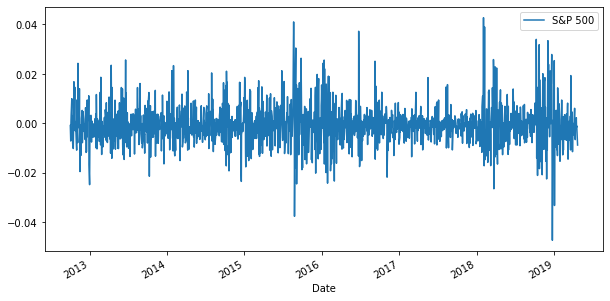

In [93]:
# Plot daily returns of sp500

sp500_df.plot(figsize=(10,5))

In [94]:
# Calculate the cumulative returns of Whales

whale_cumulative_returns = (1 + whale_df).cumprod()
whale_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:xlabel='Date'>

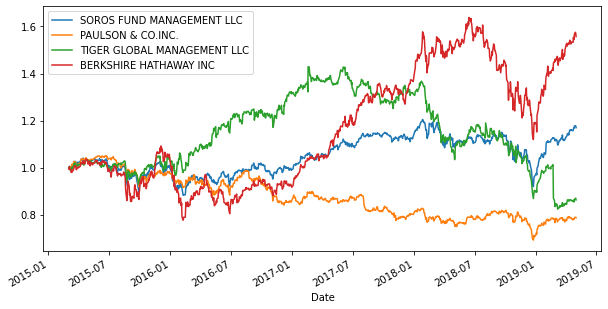

In [95]:
# Plot the daily returns of Whales
whale_cumulative_returns.plot(figsize=(10,5))

In [96]:
# Calculate the cumulative returns of Algo

algo_cumulative_returns = (1 + algo_df).cumprod()
algo_cumulative_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


<AxesSubplot:xlabel='Date'>

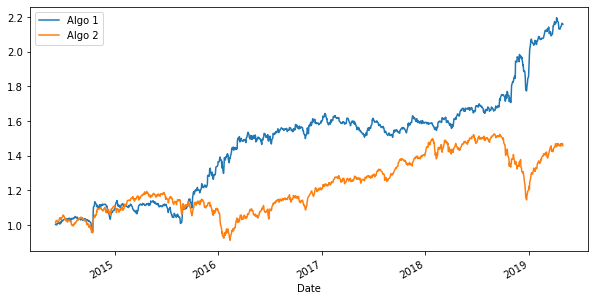

In [97]:
# Plot the daily returns of Algo
algo_cumulative_returns.plot(figsize=(10,5))

In [98]:
# Calculate the cumulative returns of sp500

sp500_cumulative_returns = (1 + sp500_df).cumprod()
sp500_cumulative_returns.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,0.991236
2019-04-18,0.990234
2019-04-17,0.988673
2019-04-16,0.990926


<AxesSubplot:xlabel='Date'>

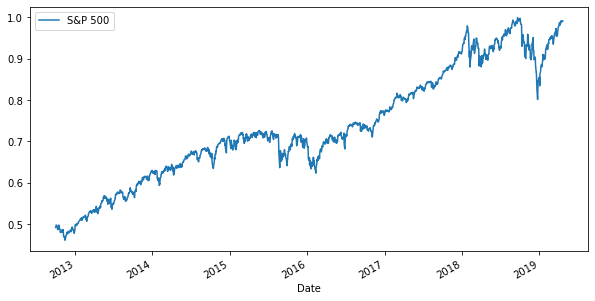

In [99]:
# Plot the daily returns of sp500
sp500_cumulative_returns.plot(figsize=(10,5))

<AxesSubplot:>

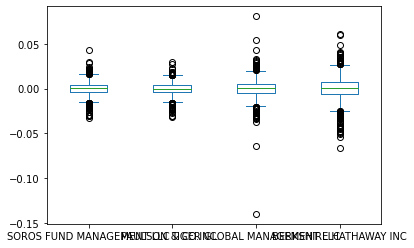

In [100]:
# Box plot to visually show risk for Whales Returns

whale_df.plot.box()

<AxesSubplot:>

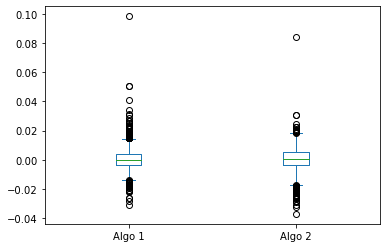

In [101]:
# Box plot to visually show risk for Algo Returns

algo_df.plot.box()

<AxesSubplot:>

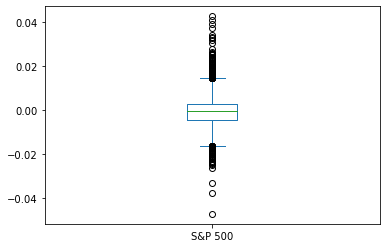

In [102]:
# Box plot to visually show risk for SP500 history

sp500_df.plot.box()

In [103]:
# Calculate the daily standard deviations of whale returns

whale_daily_std = whale_df.std()
whale_daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [104]:
# Calculate the daily standard deviations of algo returns

algo_daily_std = algo_df.std()
algo_daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [105]:
# Calculate the daily standard deviations of SP500 history

sp500_daily_std = sp500_df.std()
sp500_daily_std.head()

S&P 500    0.008135
dtype: float64

In [135]:
# Determine which portfolios are riskier than the S&P 500

print(f"Portfolios in Order of Risk")

print(f"BERKSHIRE HATHAWAY INC         0.012831")
print(f"TIGER GLOBAL MANAGEMENT LLC    0.010824")
print(f"Algo 2                         0.008466")
print(f"S&P 500                        0.008135")
print(f"Algo 1                         0.007988")
print(f"SOROS FUND MANAGEMENT LLC      0.007842")
print(f"PAULSON & CO.INC.              0.006977")


Portfolios in Order of Risk
BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
Algo 2                         0.008466
S&P 500                        0.008135
Algo 1                         0.007988
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977


In [107]:
# Calculate the annualized standard deviation for Whales (252 trading days)

whales_annualized_std = whale_daily_std * np.sqrt(252)
whales_annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [108]:
# Calculate the annualized standard deviation for Algo (252 trading days)

algo_annualized_std = algo_daily_std * np.sqrt(252)
algo_annualized_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [109]:
# Calculate the annualized standard deviation for SP500 (252 trading days)

sp500_annualized_std = sp500_daily_std * np.sqrt(252)
sp500_annualized_std.head()

S&P 500    0.129133
dtype: float64

In [110]:
# Calculate the rolling standard deviation for whales using a 21-day window

whale_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.004123,0.005374,0.005438,0.006584


<AxesSubplot:xlabel='Date'>

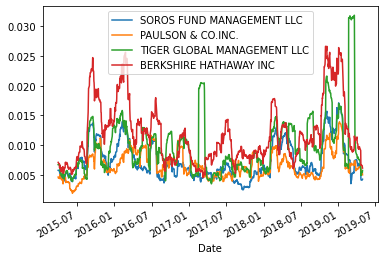

In [111]:
# Plot the rolling standard deviation for whales

whale_df.rolling(window=21).std().plot()

In [112]:
# Calculate the rolling standard deviation for algo using a 21-day window

algo_df.rolling(window=21).std()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN
...,...,...
2019-04-25,0.005801,0.005764
2019-04-26,0.005562,0.005700
2019-04-29,0.005251,0.005622


<AxesSubplot:xlabel='Date'>

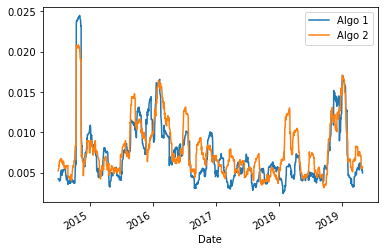

In [113]:
# Plot the rolling standard deviation for algo

algo_df.rolling(window=21).std().plot()

In [114]:
# Calculate the rolling standard deviation for sp500 using a 21-day window

sp500_df.rolling(window=21).std()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN
...,...
2012-10-05,0.009007
2012-10-04,0.007462
2012-10-03,0.007424


<AxesSubplot:xlabel='Date'>

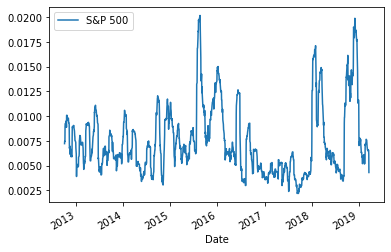

In [115]:
# Plot the rolling standard deviation for sp500

sp500_df.rolling(window=21).std().plot()

In [116]:
# Calculate the correlations

correlation = joined_data_rows.corr()
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

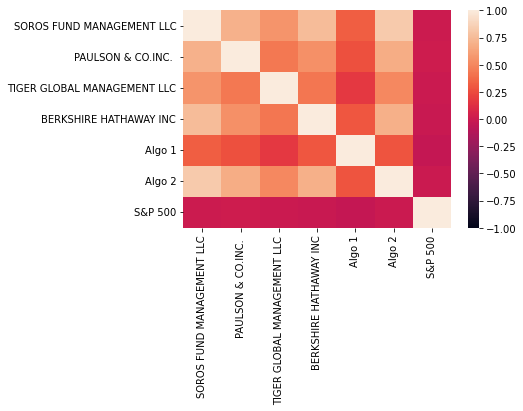

In [117]:
# Display correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1)

In [118]:
# Calculate covariance of a single portfolio

covariance = whale_df['SOROS FUND MANAGEMENT LLC'].cov(sp500_df['S&P 500'])
covariance


3.889726983062244e-08

In [119]:
# Calculate variance of S&P 500

variance = sp500_df['S&P 500'].var()
variance


6.617241051948298e-05

In [120]:
# Computing beta

beta = covariance / variance
beta


0.0005878170301680338

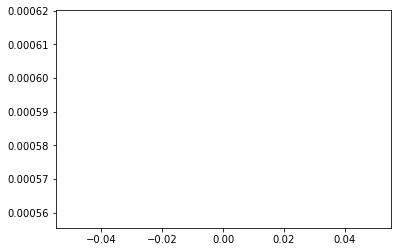

In [121]:
# Plot beta trend

plt.plot(beta)
plt.show()

In [122]:
# Use `ewm` to calculate the rolling 60 day window


joined_data_rows.ewm(com=60).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000497,-0.000836,-0.001523,-0.001133,-0.005293,0.000747,0.001583
2015-03-05,0.001689,0.000829,-0.000209,0.001530,-0.003823,0.001959,0.005919
2015-03-06,-0.000769,-0.000299,-0.002329,-0.002218,-0.004114,-0.001479,0.003396
2015-03-09,-0.000490,0.000636,-0.000640,-0.002101,-0.004389,-0.000904,0.006260
...,...,...,...,...,...,...,...
2019-04-16,0.000985,0.000264,-0.001236,0.001412,0.001208,0.000880,-0.000771
2019-04-17,0.000922,0.000154,-0.001288,0.001441,0.001019,0.000780,-0.000784
2019-04-18,0.000930,0.000171,-0.001257,0.001449,0.000993,0.000747,-0.000788


In [123]:
# Annualized Sharpe Ratios

sharpe_ratios = ((joined_data_rows.mean()-joined_data_rows['S&P 500'].mean()) * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.920419
PAULSON & CO.INC.              0.150484
TIGER GLOBAL MANAGEMENT LLC    0.287699
BERKSHIRE HATHAWAY INC         0.966507
Algo 1                         1.963017
Algo 2                         1.035152
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

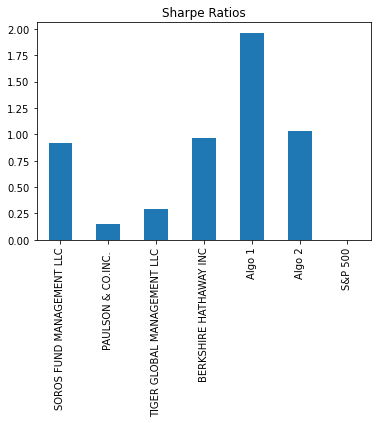

In [124]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [125]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

print(f"The Shape ratio shows the the Algo strategies outperform the whales.")

The Shape ratio shows the the Algo strategies outperform the whales.
